In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Function to handle the collision with the wall and between the blocks²
def collide_blocks(v1, v2):
    v1_new = ((m1 - m2) * v1 + 2 * m2 * v2) / (m1 + m2)
    v2_new = ((m2 - m1) * v2 + 2 * m1 * v1) / (m1 + m2)
    return v1_new, v2_new

# Function to handle collisions with the wall
def collide_wall(v1):
    return -v1  # Reverse the velocity


def show_state_space():
    # Plot the trajectory in state space
    plt.figure(figsize=(8, 8))
    plt.plot(x_trajectory, y_trajectory, marker='o', linestyle='-', color='b', label='Trajectory')

    # Plot the circle representing conservation of energy
    # Equation: (sqrt(m1)*v1)^2 + (sqrt(m2)*v2)^2 = m2 * v2_initial^2
    # In terms of x and y: x^2 + y^2 = m2 * v2_initial^2
    v2_initial = -10.0  # Initial velocity of block 2
    radius = np.sqrt(m2) * abs(v2_initial)  # Radius of the circle
    theta = np.linspace(0, 2 * np.pi, 1000)  # Angle for parameterizing the circle
    circle_x = radius * np.cos(theta)  # x-coordinates of the circle
    circle_y = radius * np.sin(theta)  # y-coordinates of the circle
    plt.plot(circle_x, circle_y, linestyle='--', color='r', label='Energy Conservation Circle')

    # Plot the point where v1 = v2 and both are positive
    plt.plot(x_equal, y_equal, marker='x', color='m', markersize=10, label=r'$v_1 = v_2 > 0$')
    # Plot the line from (0, 0) to (x_equal, y_equal)
    #plt.plot([0, x_equal], [0, y_equal], linestyle='-', color='g', label='Line to $v_1 = v_2 > 0$')
    # Plot the line y = x * sqrt(m2 / m1) for x > 0
    x_line = np.linspace(0, radius+30, 1000)  # x values for the line
    y_line = x_line * np.sqrt(m1 / m2)
    #y_line = x_line * y_equal/x_equal  # y = x * sqrt(m2 / m1)
    plt.plot(x_line, y_line, linestyle='-', color='g', label=r'$y = x \cdot \sqrt{m_1 / m_2}$')

    # Plot settings
    plt.xlabel(r'$x = \sqrt{m_2} \cdot v_2$')
    plt.ylabel(r'$y = \sqrt{m_1} \cdot v_1$')
    plt.title(f'State Space Trajectory of Colliding Blocks (Collisions: {collision_count})')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()


Total collisions: 31
Pi : 3.1


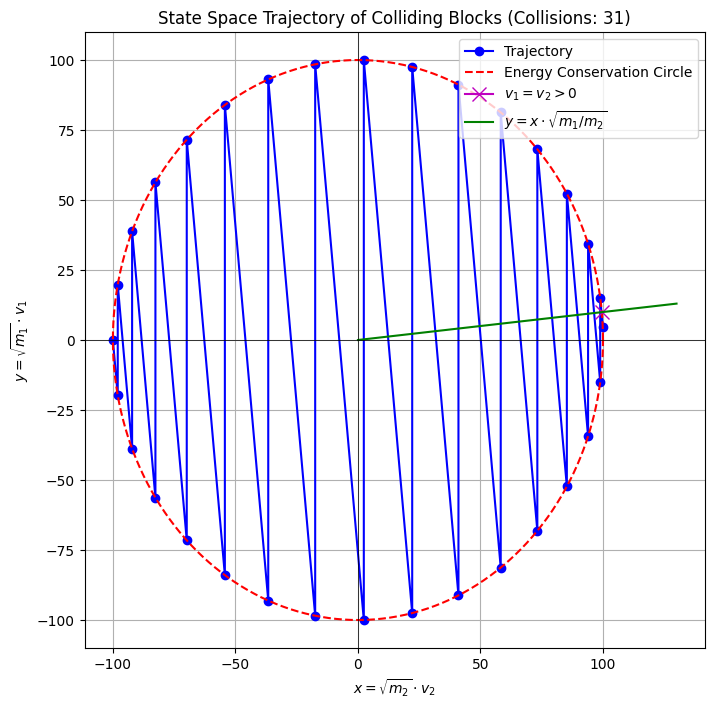

In [5]:

debug = False

# Constants
m1 = 1.0  # Mass of block 1 (smaller block)
n = 1
m2 = 100**n  # Mass of block 2 (larger block)
v1 = 0.0  # Initial velocity of block 1
v2 = -10.0  # Initial velocity of block 2 (negative because it's moving toward block 1)
collision_count = 0  # Counter for collisions

# State space coordinates
x = np.sqrt(m2) * v2  # x corresponds to sqrt(m2) * v2
y = np.sqrt(m1) * v1  # y corresponds to sqrt(m1) * v1

# Lists to store the trajectory
x_trajectory = [x]
y_trajectory = [y]

# Simulation loop
while True:
    # Check if block 2 is moving toward block 1
    if v2 < v1:
        # Collision between blocks
        v1, v2 = collide_blocks(v1, v2)
        collision_count += 1

        # Update state space coordinates
        x = np.sqrt(m2) * v2  # x corresponds to sqrt(m2) * v2
        y = np.sqrt(m1) * v1  # y corresponds to sqrt(m1) * v1

        # Store the trajectory
        x_trajectory.append(x)
        y_trajectory.append(y)

        if debug :
            # Debugging output
            print(f"Block collision {collision_count}: v1 = {v1}, v2 = {v2}")
            print(f"State space: x = {x}, y = {y}")

    else:
        # Block 2 is moving away, so no more collisions
        break

    # Check if block 1 hits the wall
    if v1 < 0:
        v1 = collide_wall(v1)
        collision_count += 1

        # Update state space coordinates
        x = np.sqrt(m2) * v2  # x corresponds to sqrt(m2) * v2
        y = np.sqrt(m1) * v1  # y corresponds to sqrt(m1) * v1

        # Store the trajectory
        x_trajectory.append(x)
        y_trajectory.append(y)

        if debug :
            # Debugging output
            print(f"Wall collision {collision_count}: v1 = {v1}")
            print(f"State space: x = {x}, y = {y}")

# Compute the state coordinates where v1 = v2 and both are positive
v_initial = -10.0  # Initial velocity of block 2
v_equal = np.sqrt(m2) * v_initial / np.sqrt(m2 + m1)  # v1 = v2
x_equal = - m2 * v_initial / np.sqrt(m2 + m1)  # x coordinate
y_equal = - np.sqrt(m1 * m2) * v_initial / np.sqrt(m2 + m1)  # y coordinate

print(f"Total collisions: {collision_count}")
print(f"Pi : {collision_count/np.sqrt(m2/m1)}")

if m2 <= 100 :
    show_state_space()

